[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/abs/1502.01852)

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)


In [1]:
import torch
from torch.nn import functional as F

import matplotlib.pyplot as plt

## Expect Initial Loss


In [153]:
X = torch.randn((27, 64))
W = torch.randn((64, 27)) * 0.01
b = torch.randn(27) * 0

hpre = X @ W + b
h = F.tanh(hpre)

F.cross_entropy(h, torch.tensor([1] * 27))

tensor(3.3149)

In [125]:
torch.tensor((1 / 27)).log()

tensor(-3.2958)

## Dead Neurons


torch.Size([10, 100])

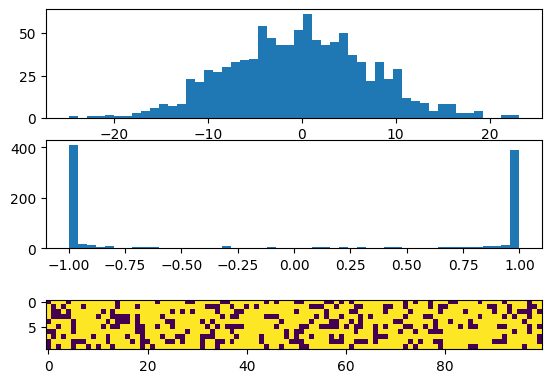

In [154]:
X = torch.randn((10, 64))
W = torch.randn((64, 100))

hpre = X @ W
h = F.tanh(hpre)

fig, axs = plt.subplots(3)
axs[0].hist(hpre.reshape(-1), bins=50)
axs[1].hist(h.reshape(-1), bins=50)
axs[2].imshow(h.abs() > 0.99)
h.shape

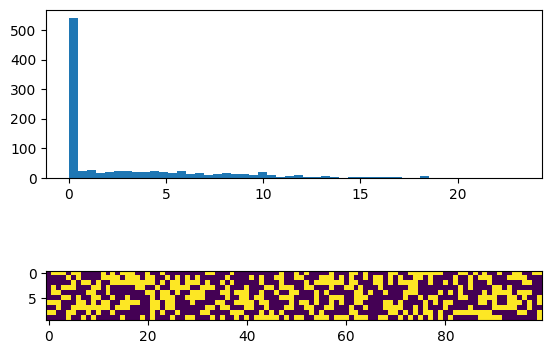

In [155]:
h = F.relu(hpre)
fig, axs = plt.subplots(2)
axs[0].hist(h.reshape(-1), bins=50)
axs[1].imshow(h.abs() > 0.99)

In [156]:
b = torch.tanh(torch.tensor([9.0, 999, 9999], requires_grad=True))
b.retain_grad()
a = F.cross_entropy(b, torch.tensor([1.0, 1, 1]))
a.retain_grad()
a.backward()
b.detach(), b.grad, a.grad

(tensor([1.0000, 1.0000, 1.0000]),
 tensor([-5.9605e-08, -5.9605e-08, -5.9605e-08]),
 tensor(1.))

## Dead Neuron Fix


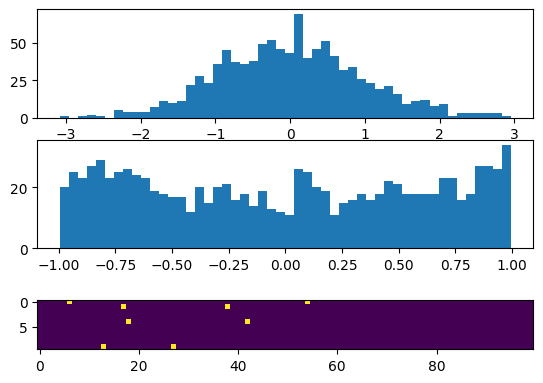

In [183]:
X = torch.randn((10, 64))
W = torch.randn((64, 100)) * 0.12

hpre = X @ W
h = F.tanh(hpre)

fig, axs = plt.subplots(3)
axs[0].hist(hpre.reshape(-1), bins=50)
axs[1].hist(h.reshape(-1), bins=50)
axs[2].imshow(h.abs() > 0.99)

## Normalizing


In [191]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200)) * 5
print(X.mean(), X.std())
h = X @ W
print(h.mean(), h.std())

tensor(-0.0124) tensor(1.0054)
tensor(0.0144) tensor(16.3209)


In [190]:
X = torch.randn((1000, 10))
W = torch.randn((10, 200)) / 10**0.5  # fan-in
print(X.mean(), X.std())
h = X @ W
print(h.mean(), h.std())

tensor(0.0047) tensor(0.9953)
tensor(-0.0028) tensor(1.0154)
